Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Back-Pocket"

position_role_stats = {
    'goal_preventing' : [
        'Defensive_Half_Pressure_Acts',
        'Pressure_Acts',
        'Spoils',
        'Tackles',
        'Clearances',
        'defensive_value',
        'exp_defensive_value'
    ],
    'ball_denial' : [
        'Rebound_50s',
        'Intercepts',
        'xT_prevented',
        'defensive_value',
        'exp_defensive_value'
    ],
    'contest' : [
        'Contested_Marks',
        'Contested_Possessions',
        'Defensive_Contest_Losses',
        'Defensive_One_On_One_Contests',
        'Ground_Ball_Gets',
        'Stoppage_Clearances',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

,,,Games,Age,Height,Weight,Debut_Year,Draft_Position,Defensive_Half_Pressure_Acts_sum,defensive_value_sum,Uncontested_Possessions_sum,Stoppage_Clearances_sum,Pressure_Acts_sum,Ground_Ball_Gets_sum,Contested_Marks_sum,xT_prevented_sum,Contested_Possessions_sum,exp_defensive_value_sum,Tackles_sum,Intercepts_sum,Spoils_sum,Rebound_50s_sum,Clearances_sum,Possessions_sum,Defensive_One_On_One_Contests_sum,Defensive_Contest_Losses_sum,Percent_Played_sum,Defensive_Half_Pressure_Acts_pergame,Defensive_Half_Pressure_Acts_per100,defensive_value_pergame,defensive_value_per100,Uncontested_Possessions_pergame,Uncontested_Possessions_per100,Stoppage_Clearances_pergame,Stoppage_Clearances_per100,Pressure_Acts_pergame,Pressure_Acts_per100,Ground_Ball_Gets_pergame,Ground_Ball_Gets_per100,Contested_Marks_pergame,Contested_Marks_per100,xT_prevented_pergame,xT_prevented_per100,Contested_Possessions_pergame,Contested_Possessions_per100,exp_defensive_value_pergame,exp_defensive_value_per100,Tackles_pergame,Tackles_per100,Intercepts_pergame,Intercepts_per100,Spoils_pergame,Spoils_per100,Rebound_50s_pergame,Rebound_50s_per100,Clearances_pergame,Clearances_per100,Possessions_pergame,Possessions_per100,Defensive_One_On_One_Contests_pergame,Defensive_One_On_One_Contests_per100,Defensive_Contest_Losses_pergame,Defensive_Contest_Losses_per100,Defensive_Half_Pressure_Acts_per100_z,defensive_value_per100_z,Uncontested_Possessions_per100_z,Stoppage_Clearances_per100_z,Pressure_Acts_per100_z,Ground_Ball_Gets_per100_z,Contested_Marks_per100_z,xT_prevented_per100_z,Contested_Possessions_per100_z,exp_defensive_value_per100_z,Tackles_per100_z,Intercepts_per100_z,Spoils_per100_z,Rebound_50s_per100_z,Clearances_per100_z,Possessions_per100_z,Defensive_One_On_One_Contests_per100_z,Defensive_Contest_Losses_per100_z,goal_preventing_rating,ball_denial_rating,contest_rating,back_pocket_rating
Player,Team,Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aliir Aliir,Port Adelaide,2021,15,27.000000,194.0,96.0,2016.0,44.0,77.0,10.479412,127,5,92.0,49.0,30,1.371715,96,61.935804,21,121,76.0,63,5,223,68.0,13.0,1441,5.133333,5.343511,0.698627,0.727232,8.466667,8.813324,0.333333,0.346981,6.133333,6.384455,3.266667,3.400416,2.000000,2.081888,0.091448,0.095192,6.400000,6.662040,4.129054,4.298113,1.400000,1.457321,8.066667,8.396947,5.066667,5.274115,4.200000,4.371964,0.333333,0.346981,14.866667,15.475364,4.533333,4.718945,0.866667,0.902151,-0.915697,1.334923,-0.629655,0.414784,-0.959164,-0.119083,2.495186,-0.173319,1.326563,1.866033,-0.866922,1.177481,0.799305,0.098771,0.290485,-0.211412,2.155293,0.883087,0.221280,0.860778,0.789345,0.623801
Jake Lever,Melbourne,2021,21,25.000000,195.0,89.0,2015.0,14.0,149.0,11.467233,166,1,179.0,90.0,36,3.667270,143,76.780666,37,207,125.0,84,1,309,69.0,18.0,2076,7.095238,7.177264,0.546059,0.552372,7.904762,7.996146,0.047619,0.048170,8.523810,8.622351,4.285714,4.335260,1.714286,1.734104,0.174632,0.176651,6.809524,6.888247,3.656222,3.698491,1.761905,1.782274,9.857143,9.971098,5.952381,6.021195,4.000000,4.046243,0.047619,0.048170,14.714286,14.884393,3.285714,3.323699,0.857143,0.867052,0.057290,0.434165,-0.899070,-1.268372,-0.151666,1.041224,1.796760,1.883184,1.573390,1.317412,-0.383775,2.338055,1.236753,-0.122342,-1.234705,-0.391411,0.818377,0.780465,0.182211,1.170095,0.431420,0.594575
Jeremy Howe,Collingwood,2022,11,31.545455,190.0,85.0,2011.0,33.0,67.0,7.660565,102,3,77.0,36.0,12,1.268685,68,30.518523,17,81,52.0,63,3,170,25.0,10.0,1008,6.090909,6.646825,0.696415,0.759977,9.272727,10.119048,0.272727,0.297619,7.000000,7.638889,3.272727,3.571429,1.090909,1.190476,0.115335,0.125862,6.181818,6.746032,2.774411,3.027631,1.545455,1.686508,7.363636,8.035714,4.727273,5.158730,5.727273,6.250000,0.272727,0.297619,15.454545,16.865079,2.272727,2.480159,0.909091,0.992063,-0.224160,1.503601,-0.199172,0.136735,-0.506528,0.093173,0.705037,0.600965,1.418211,0.703613,-0.526162,0.911156,0.731742,1.373660,0.038531,0.211871,0.010101,

In [8]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

back_pocket_rating                      \
Season                                               2021      2022      2023   
Player          Team                                                            
Aliir Aliir     Port Adelaide                    0.623801  0.265282  0.557658   
Brayden Maynard Collingwood                      0.549475  0.000000  0.461167   
Brennan Cox     Fremantle                        0.000000  0.000000  0.478267   
Hayden Young    Fremantle                        0.000000  0.000000  0.471380   
Nic Newman      Carlton                          0.000000  0.000000  0.448889   
Noah Balta      Richmond                         0.000000  0.000000  0.385314   
Connor Idun     Greater Western Sydney           0.000000  0.000000  0.296825   
Jeremy Howe     Collingwood                      0.000000  0.568215  0.000000   
Dylan Grimes    Richmond                         0.305982  0.414568  0.000000   
Isaac Quaynor   Collingwood                      0.000000  0.203405  0.141714   
Ed Richards     Western Bulldogs                 0.000000  0.304206  0.000000   
Isaac Cumming   Greater Western Sydney           0.000000  0.293899  0.000000   
Paddy McCartin  Sydney                           0.000000  0.258734  0.000000   
Tom Doedee      Adelaide                         0.000000  0.225329  0.000000   
Jake Lever      Melbourne                        0.594575 -0.014480  0.000000   
Shannon Hurn    West Coast                       0.553084 -0.016370  0.000000   
Dougal Howard   St Kilda                         0.464389  0.000000  0.000000   
Josh Battle     St Kilda                         0.000000  0.000000  0.074957   
Sam Frost       Hawthorn                         0.432988  0.000000  0.000000   
Wil Powell      Gold Coast                       0.330511  0.000000  0.000000   

                                       overall_back_pocket_rating  
Season                                                             
Player          Team                                               
Aliir Aliir     Port Adelaide                            0.476559  
Brayden Maynard Collingwood                              0.331648  
Brennan Cox     Fremantle                                0.286960  
Hayden Young    Fremantle                                0.282828  
Nic Newman      Carlton                                  0.269333  
Noah Balta      Richmond                                 0.231189  
Connor Idun     Greater Western Sydney                   0.178095  
Jeremy Howe     Collingwood                              0.170464  
Dylan Grimes    Richmond                                 0.154969  
Isaac Quaynor   Collingwood                              0.146050  
Ed Richards     Western Bulldogs                         0.091262  
Isaac Cumming   Greater Western Sydney                   0.088170  
Paddy McCartin  Sydney                                   0.077620  
Tom Doedee      Adelaide                                 0.067599  
Jake Lever      Melbourne                                0.055113  
Shannon Hurn    West Coast                               0.050397  
Dougal Howard   St Kilda                                 0.046439  
Josh Battle     St Kilda                                 0.044974  
Sam Frost       Hawthorn                                 0.043299  
Wil Powell      Gold Coast                               0.033051

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

In [10]:
roles = list(position_role_stats_zscaled.keys())
role_ratings = [x+"_rating" for x in roles]
stats_list = []
for role in roles:
    stats_list.append([role+"_rating"] + position_role_stats_zscaled[role]) 

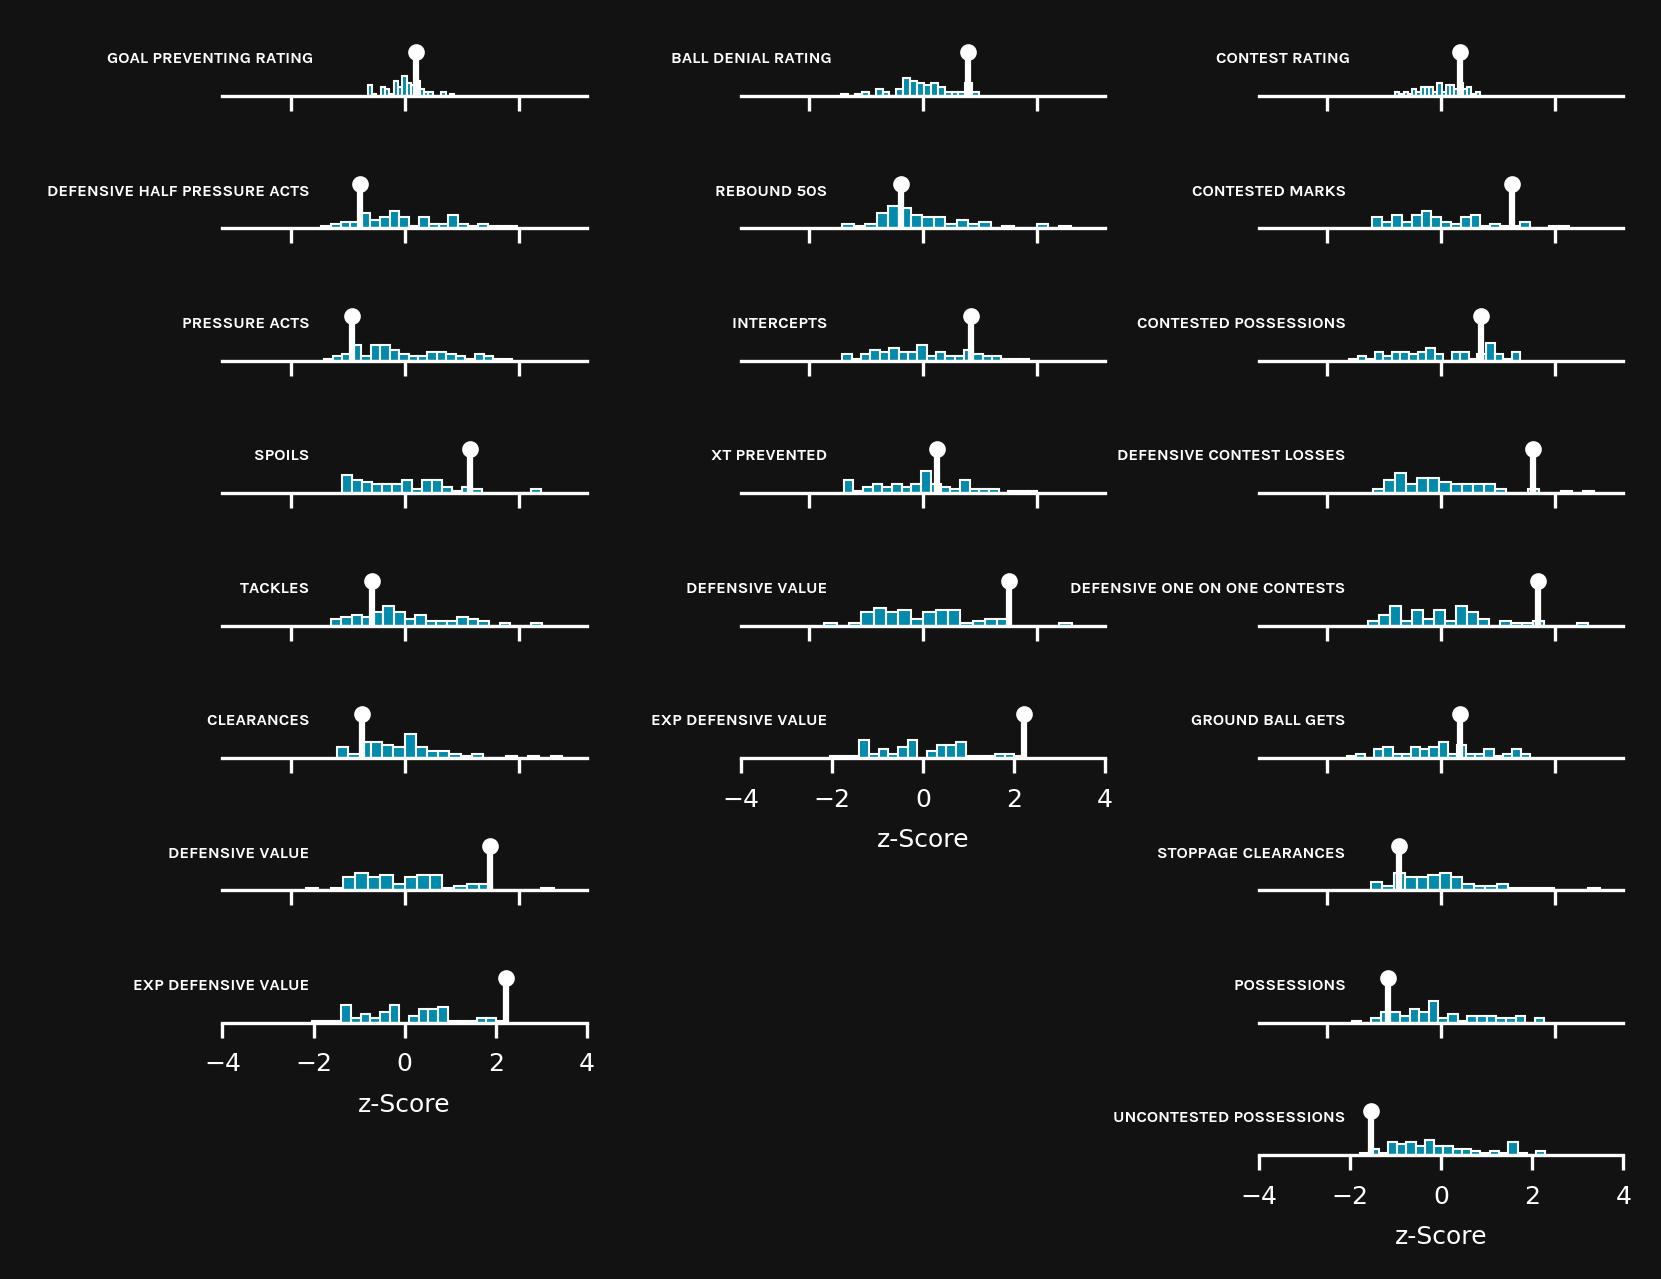

In [11]:
player = "Aliir Aliir"
team = "Port Adelaide"
season = 2023

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4, ylim = 30)

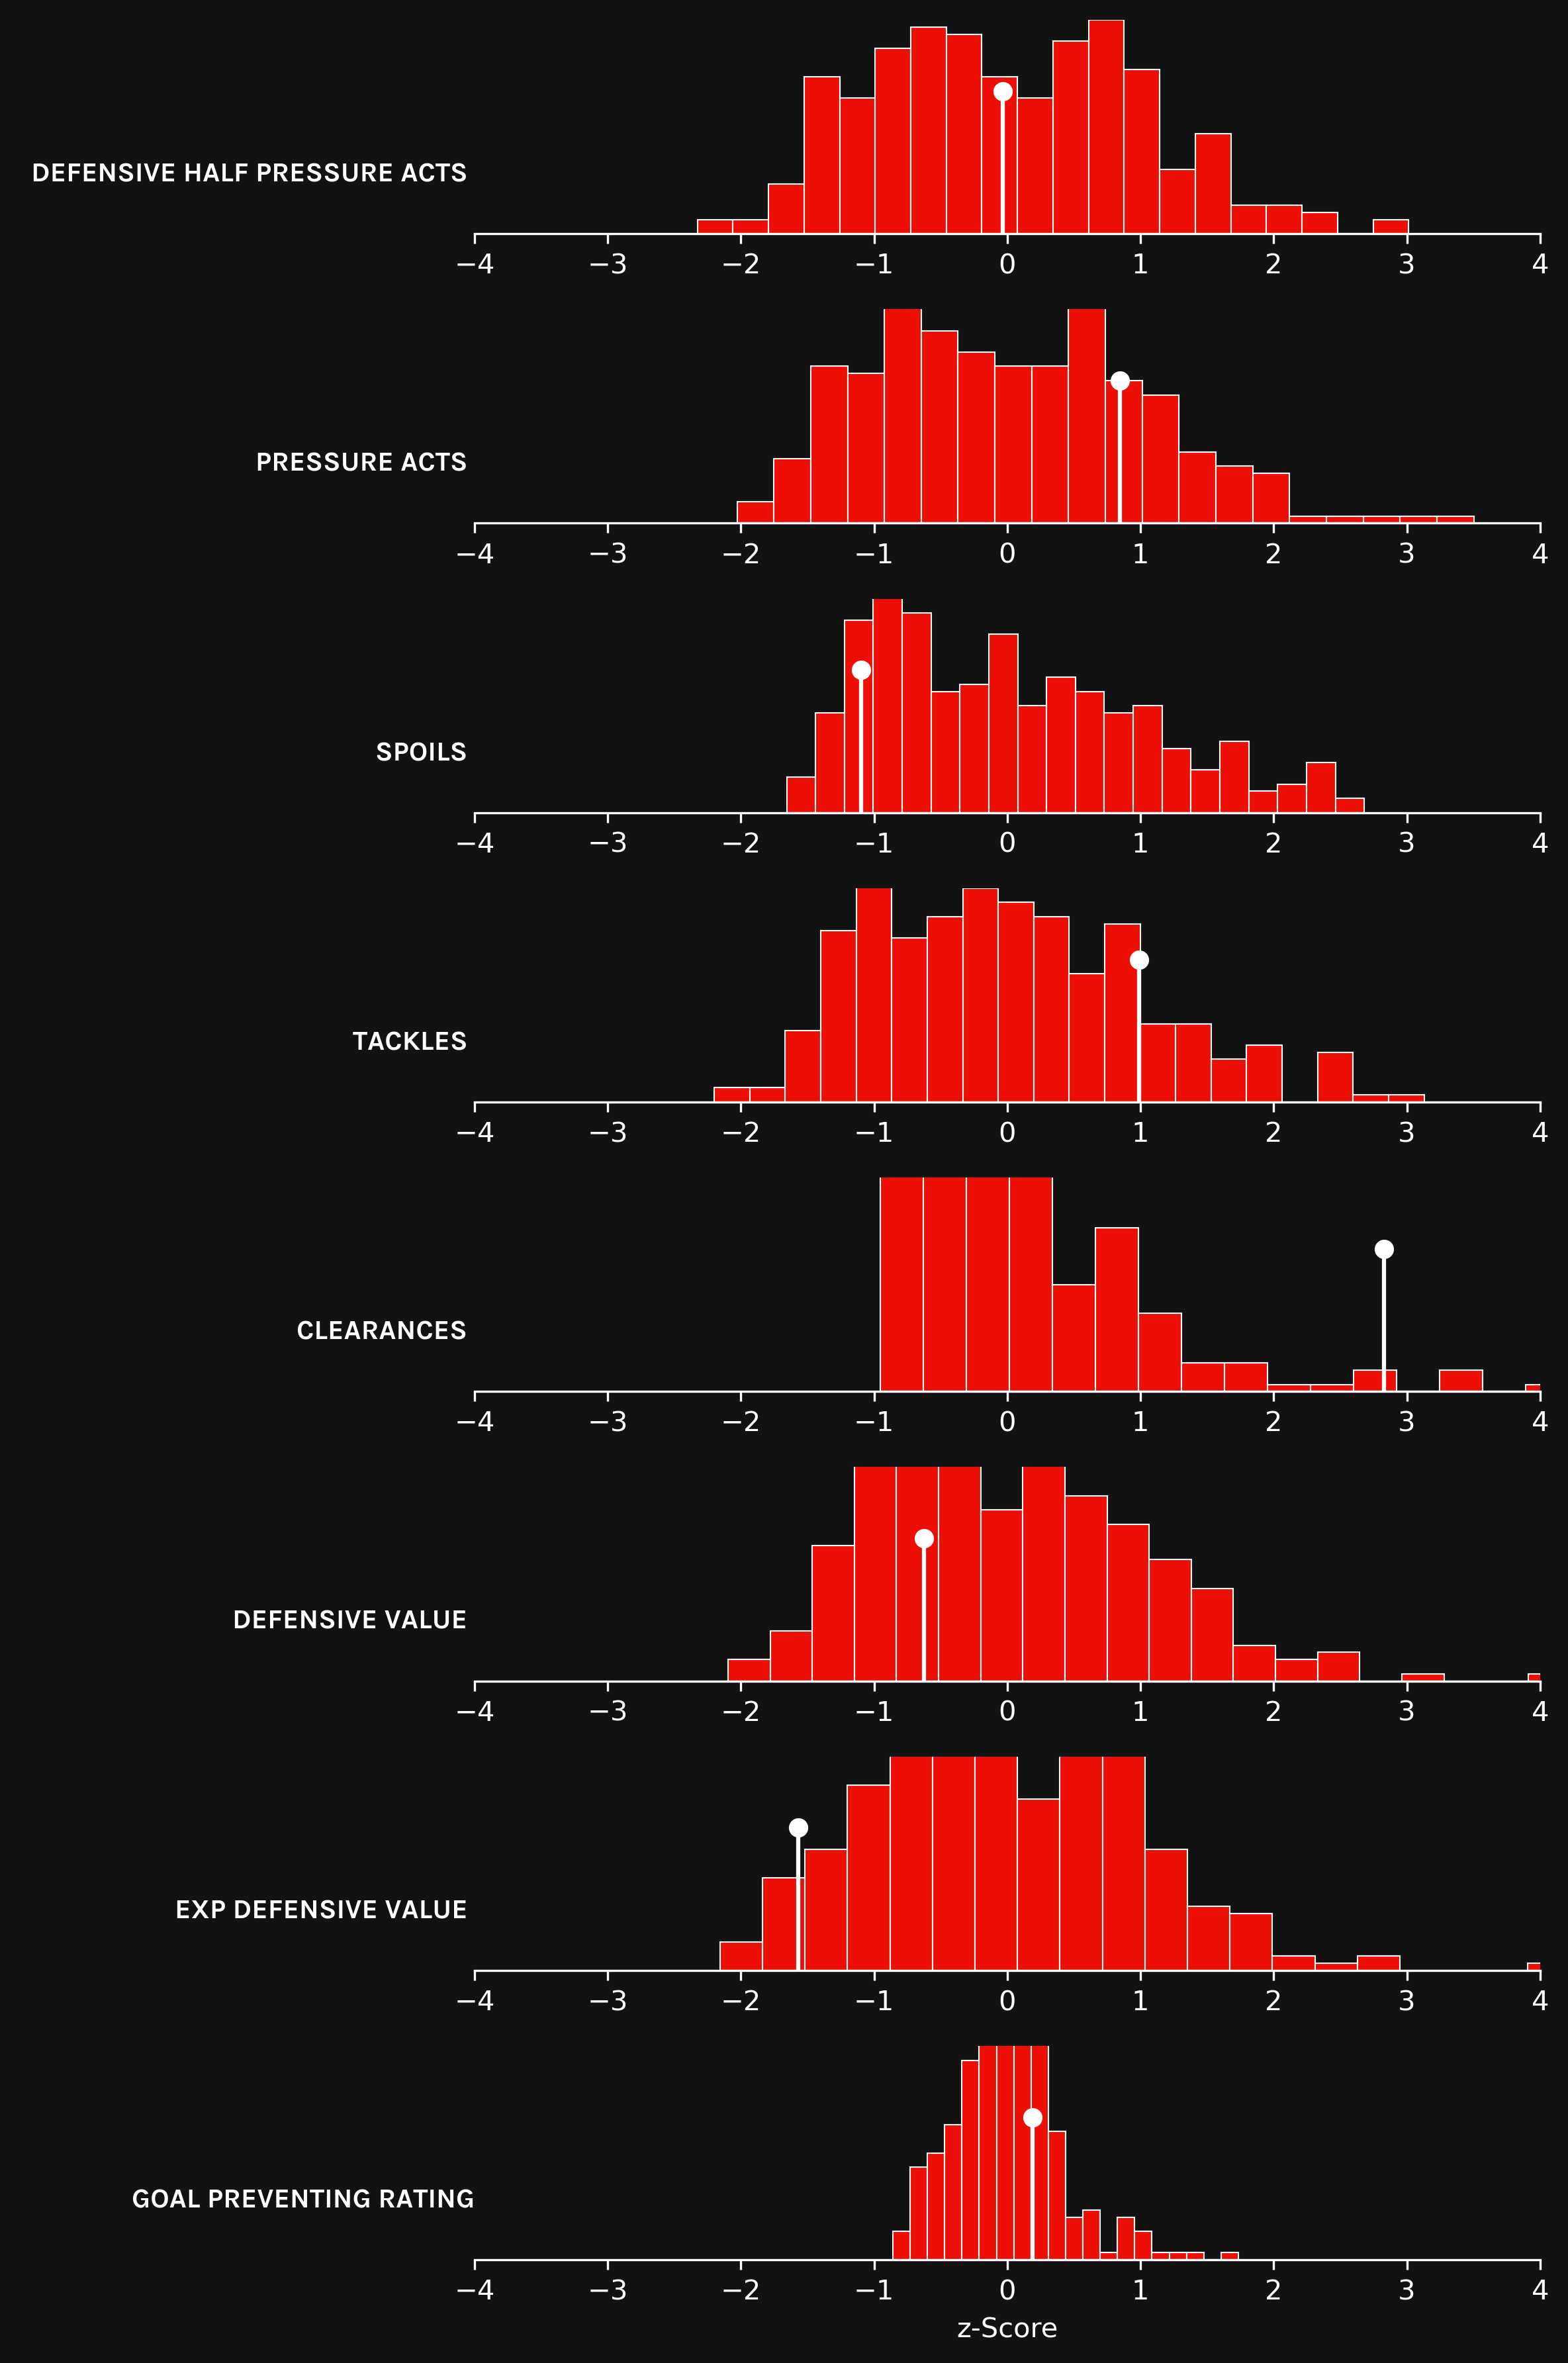

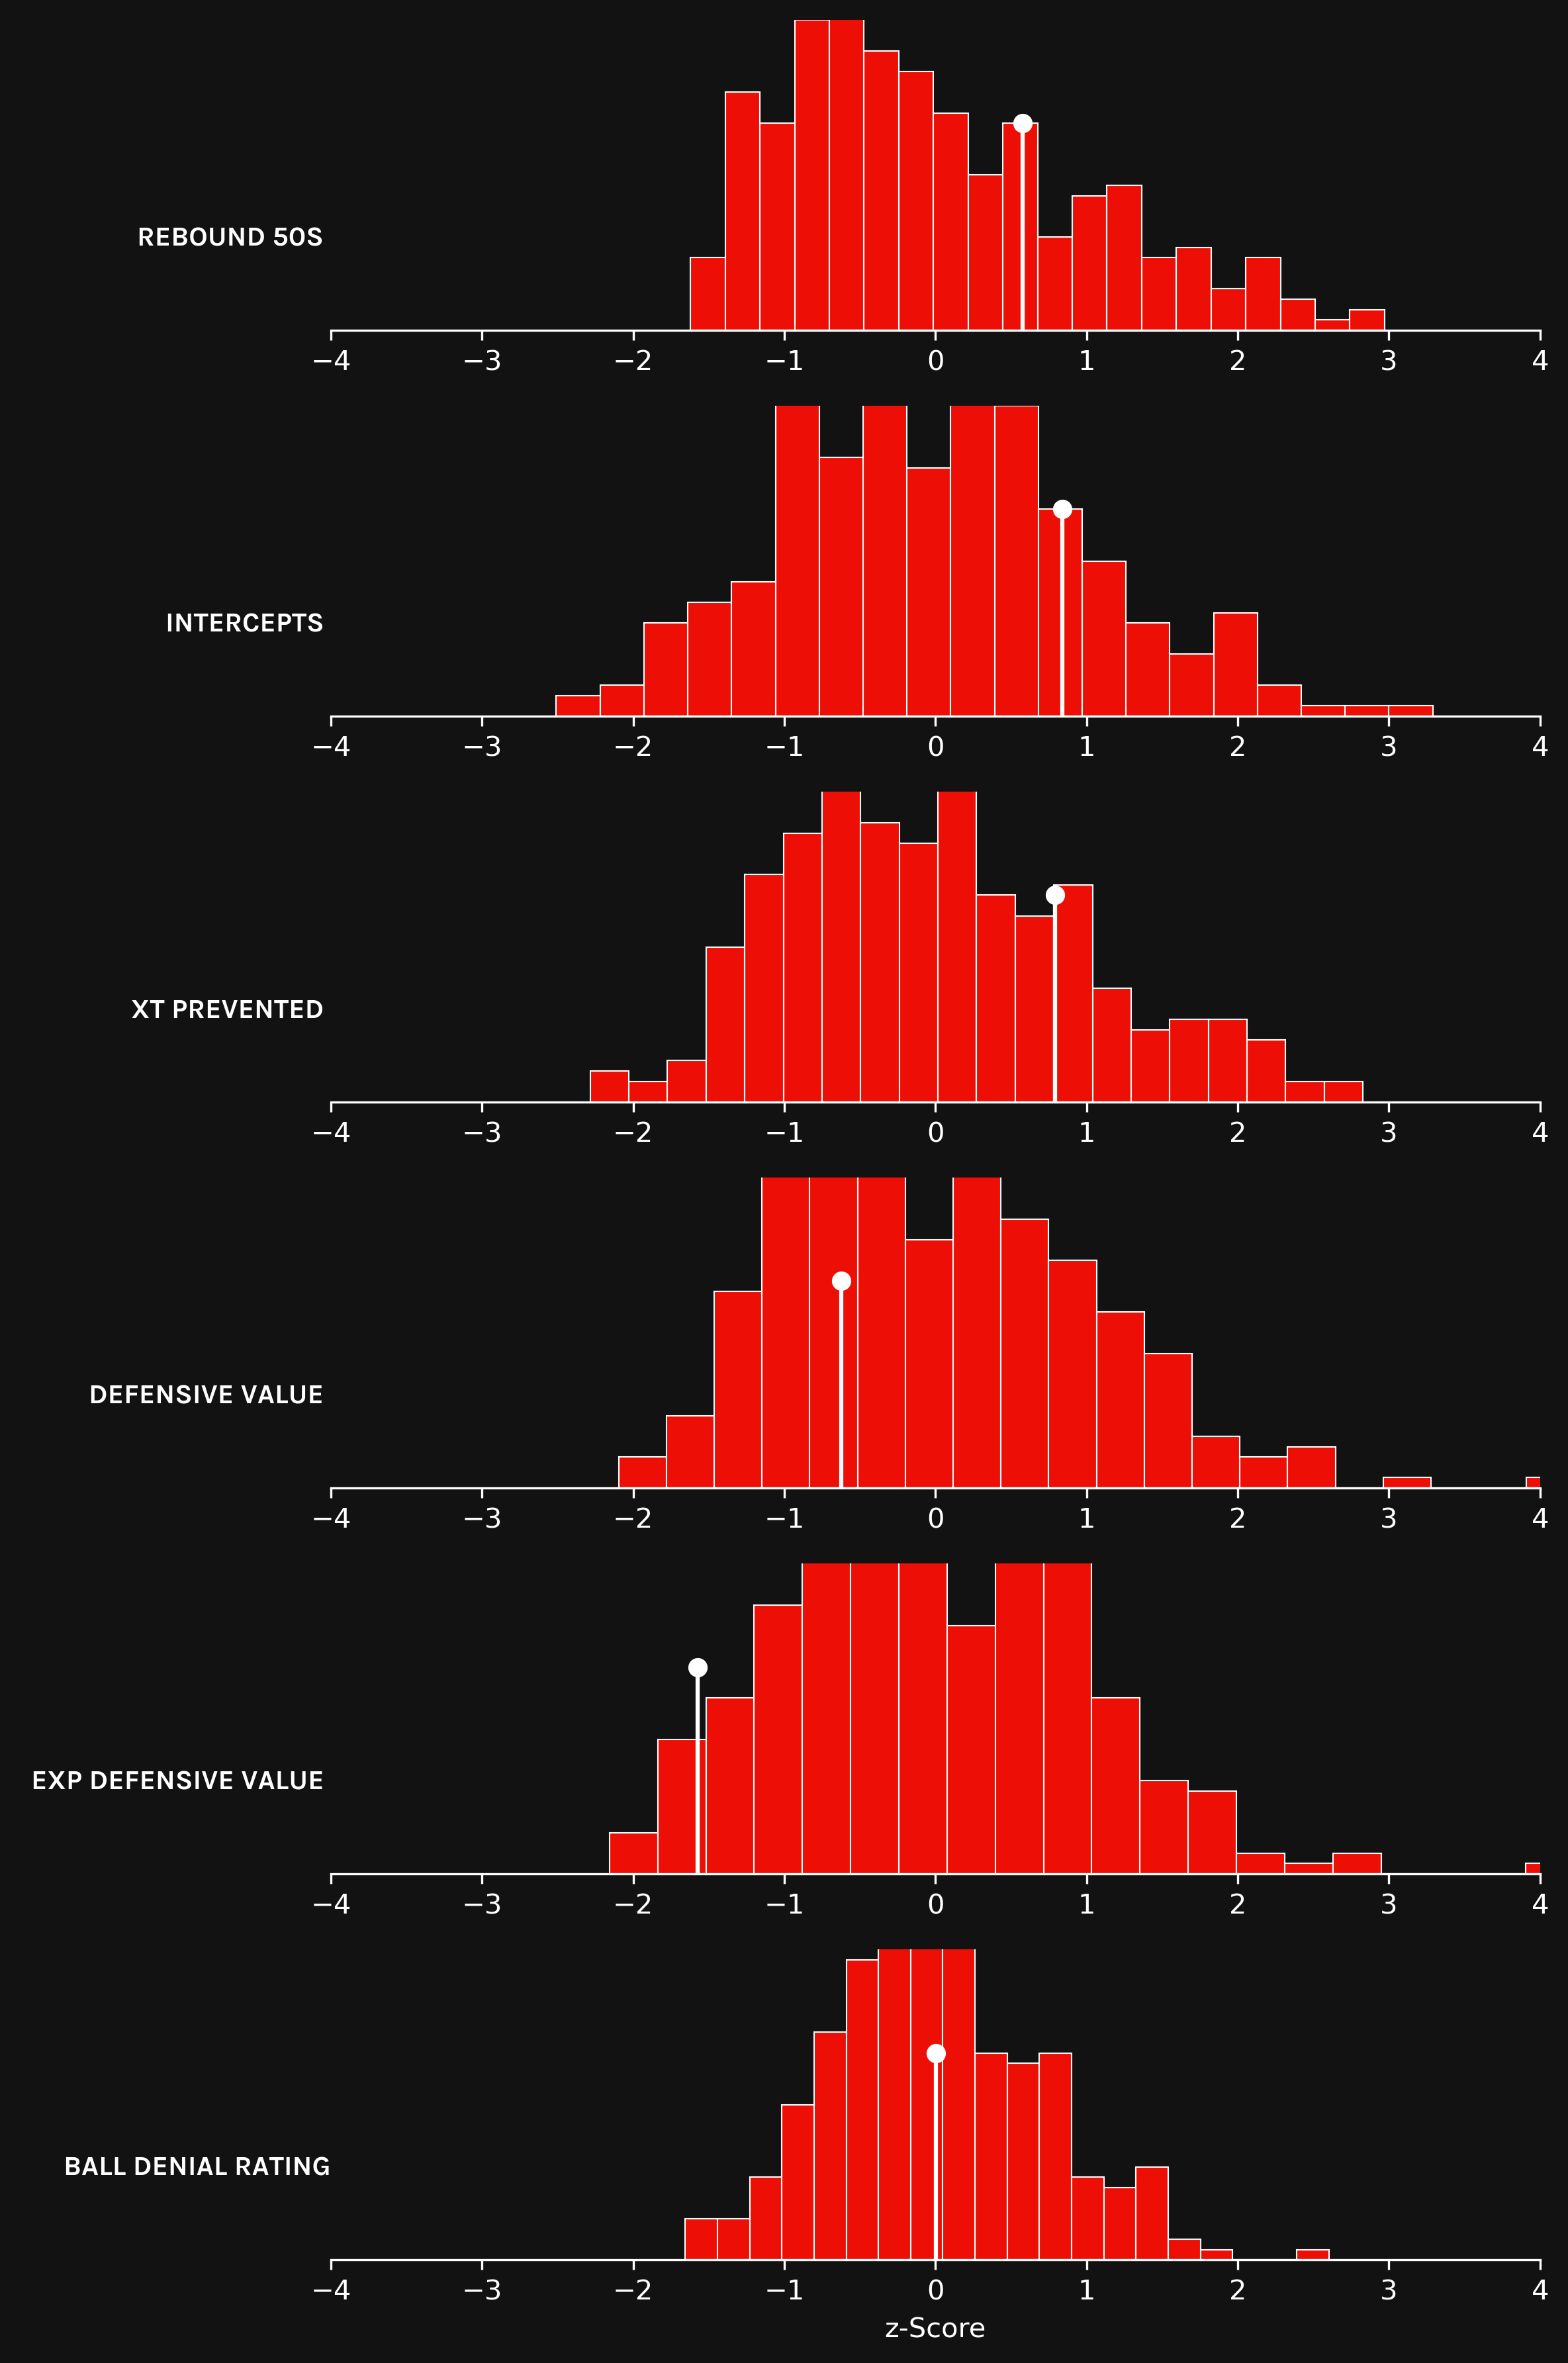

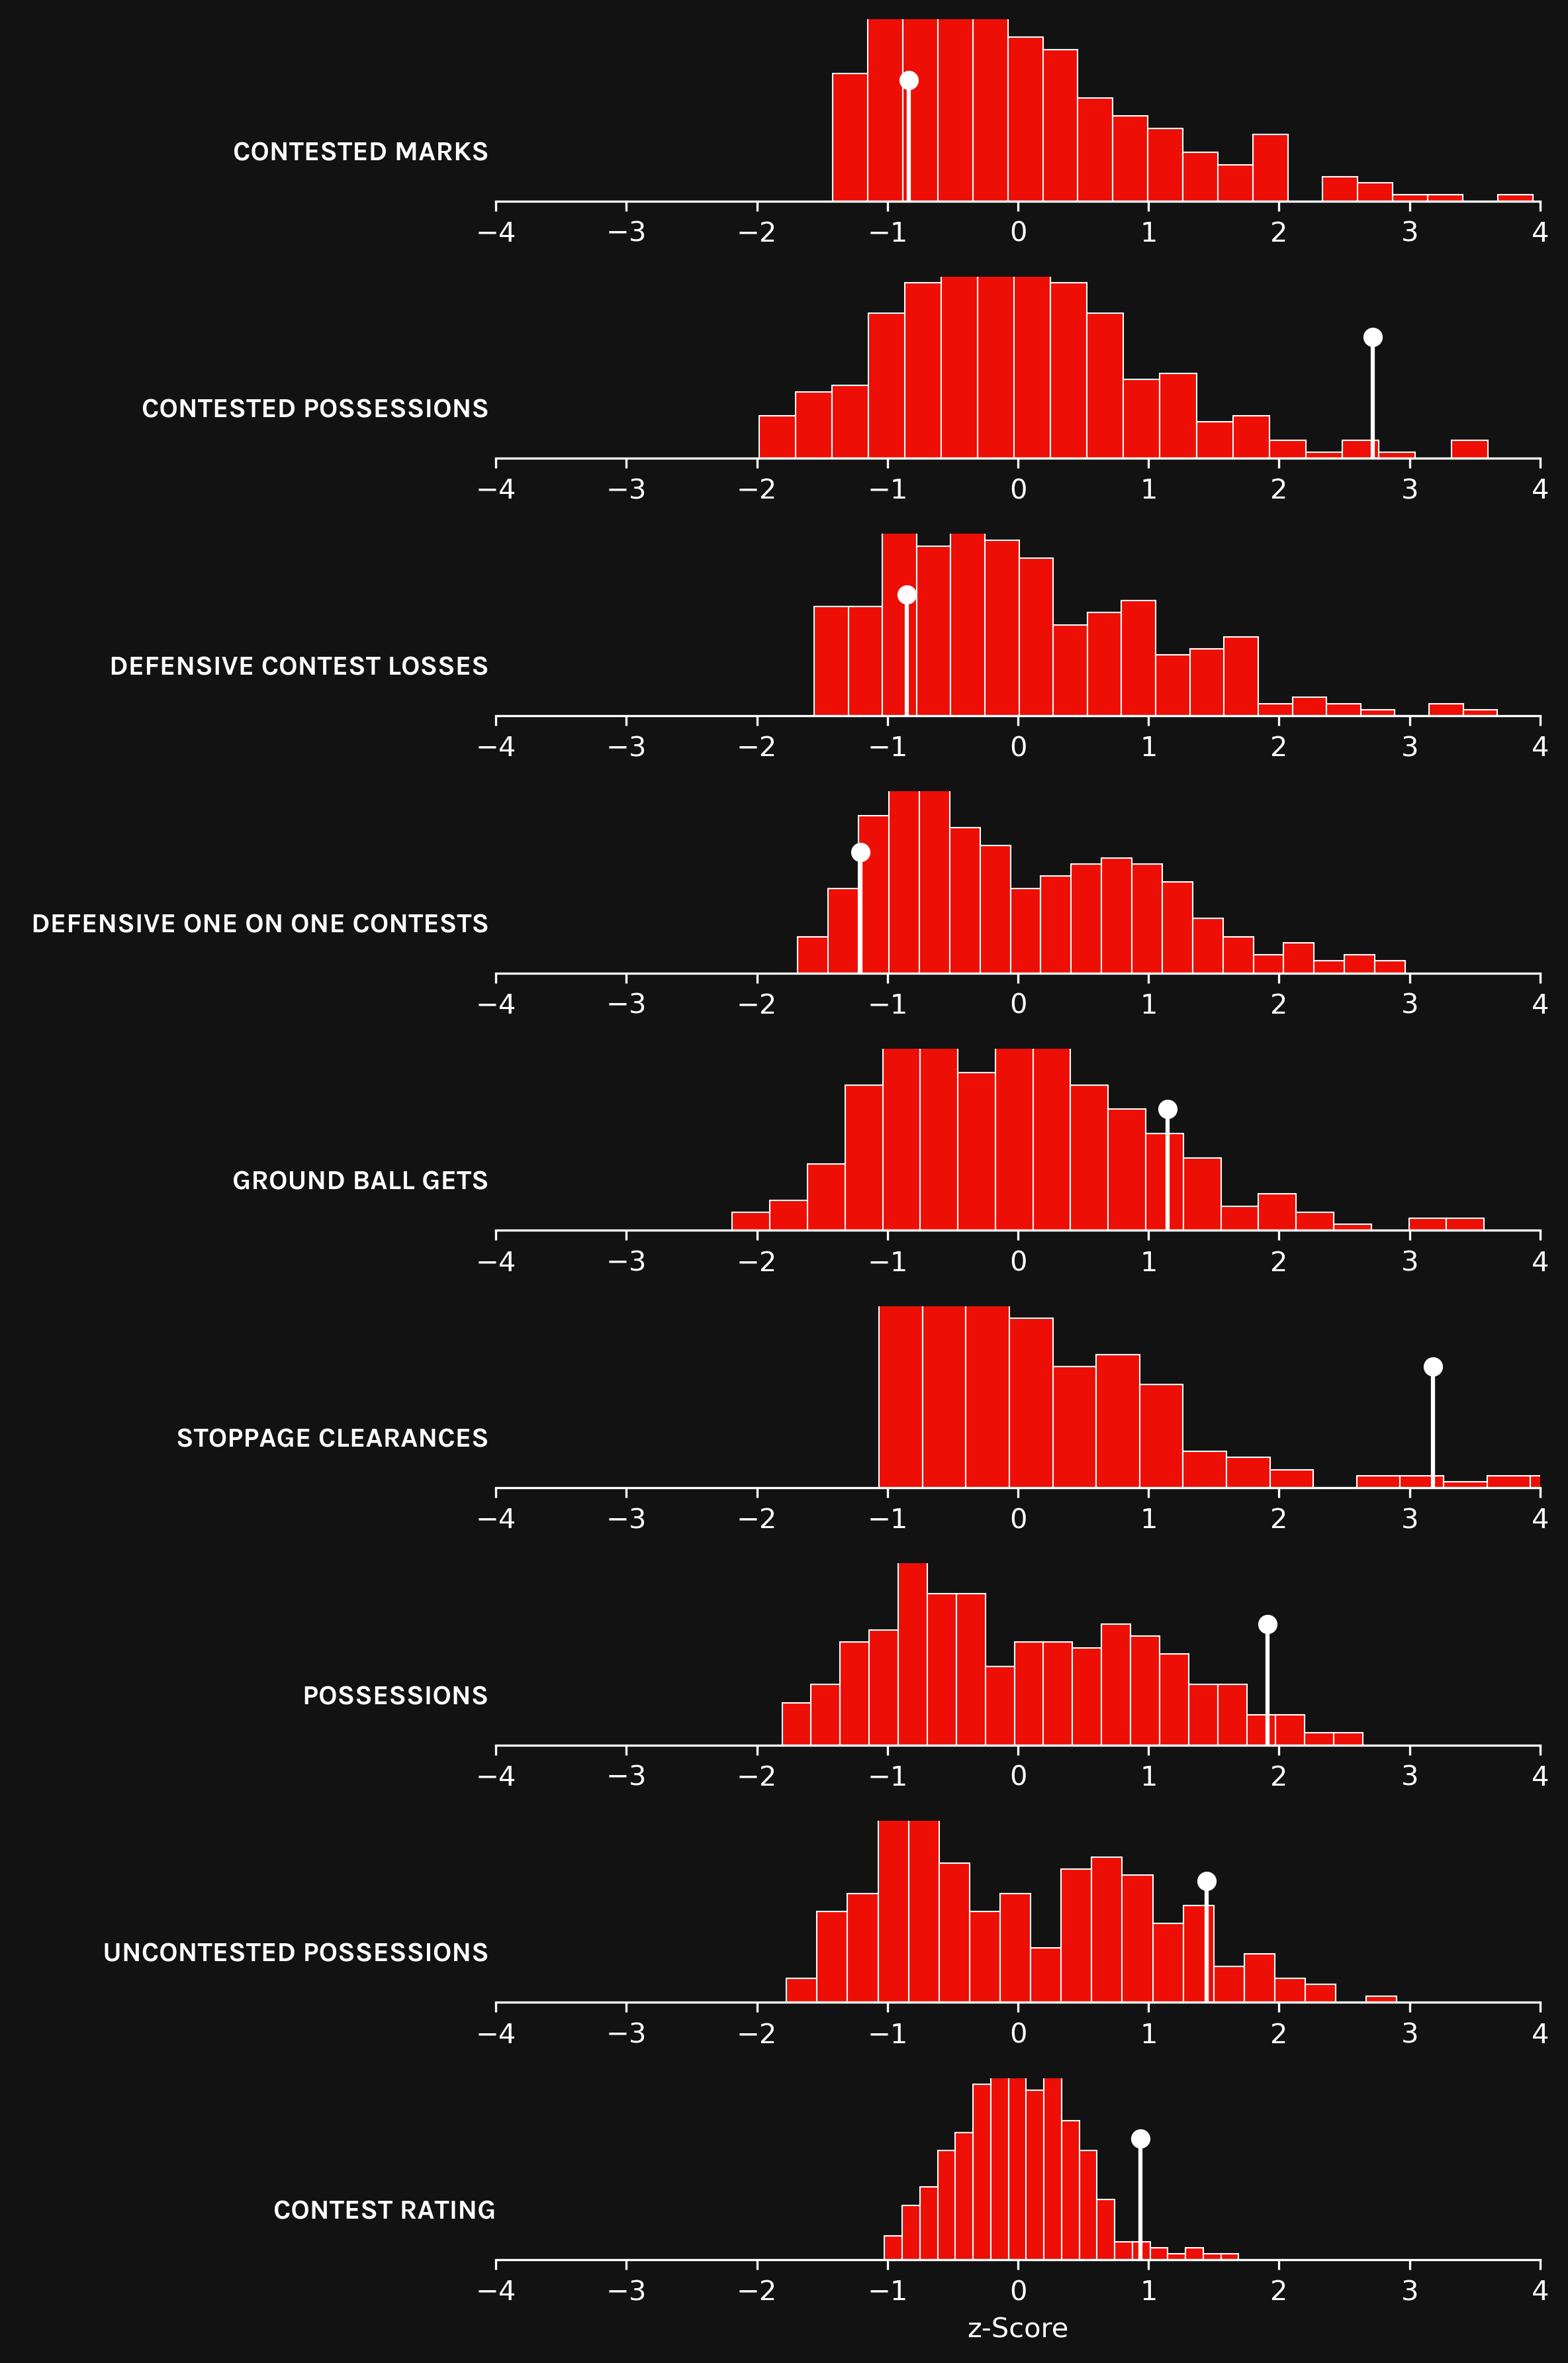

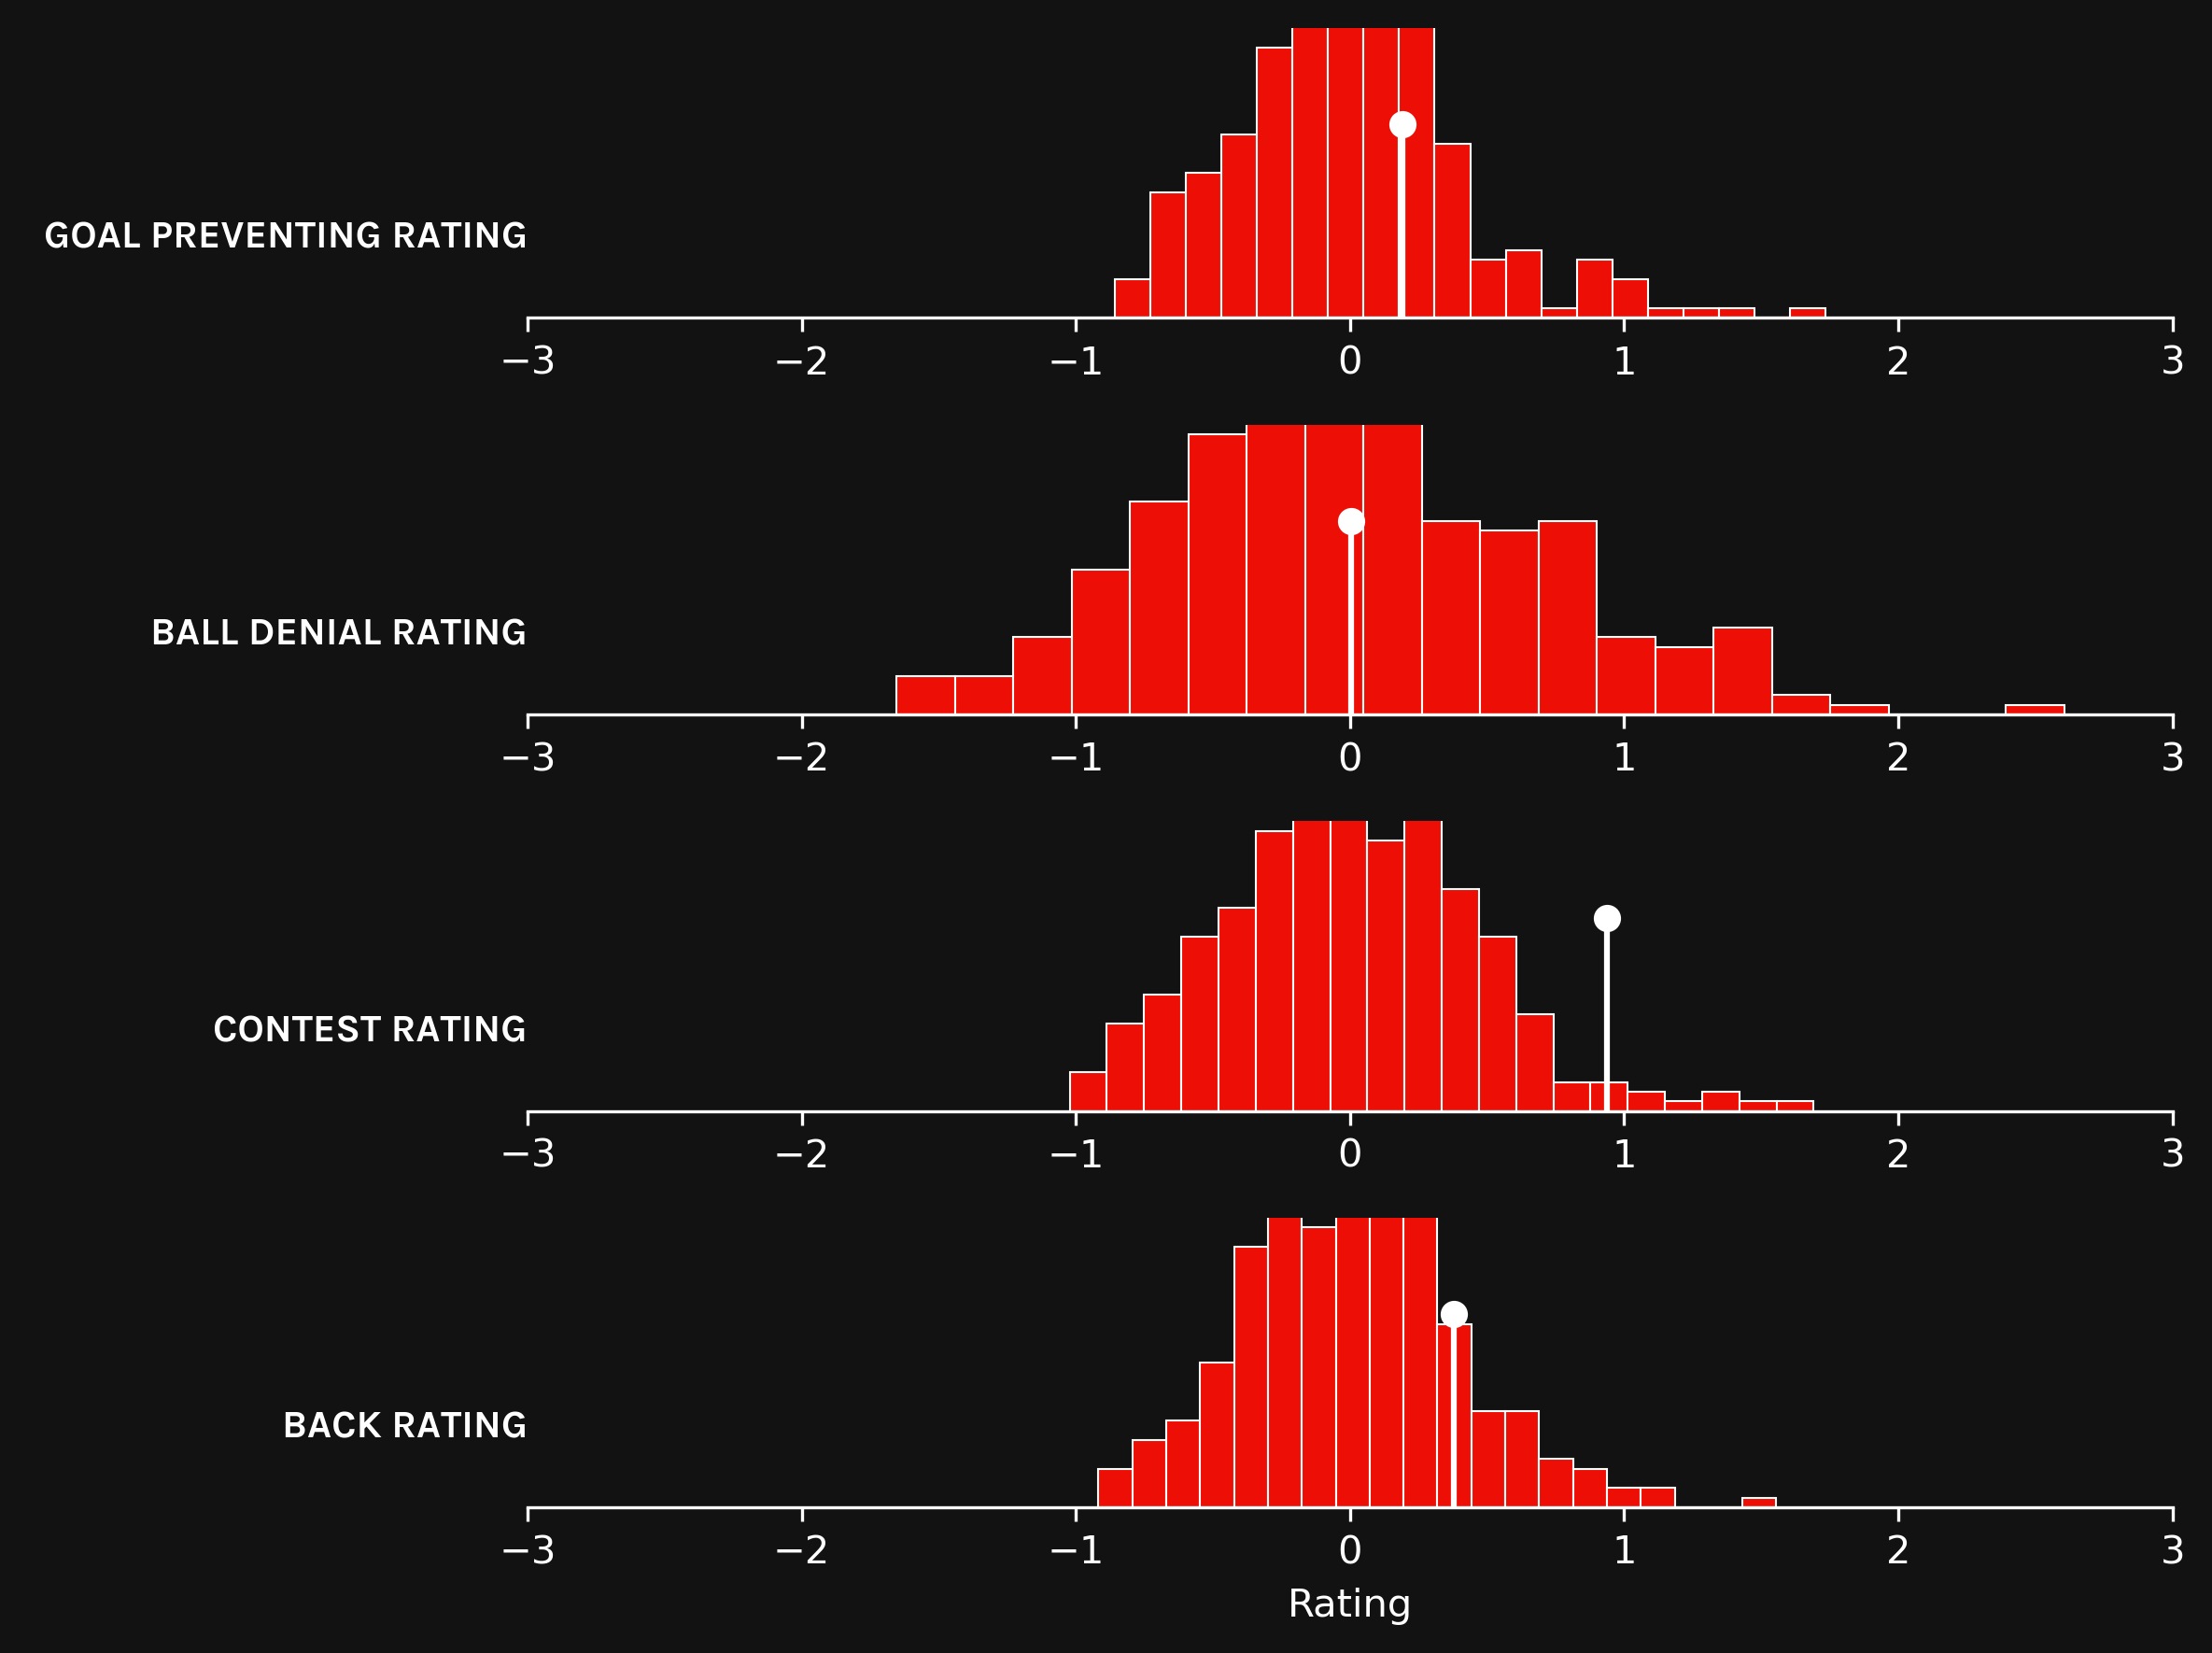

In [12]:
player = "Jack Sinclair"
team = "St Kilda"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    